<a href="https://colab.research.google.com/github/Armestrong/data_science_doenca_cardiovascular/blob/master/Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Armestrong/data_science_doenca_cardiovascular/blob/master/img/Plano%20de%20Fundo%201.jpg?raw=true" style="max-height:100%" style="max-width:100%">

[![Autor](https://img.shields.io/badge/autor-a.calazans-red.svg)](https://www.linkedin.com/in/a-calazans) [![](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/release/python-365/) [![GPLv3 license](https://img.shields.io/badge/License-GPLv3-blue.svg)](http://perso.crans.org/besson/LICENSE.html) [![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](https://github.com/carlosfab/data_science/issues)

---

# Análise Exploratória de Dados - Doenças Cardiovasculares
Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças como angina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.



Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering*  mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.


### Importar os Dados
O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100px" src="https://images.squarespace-cdn.com/content/v1/52cd81e2e4b0518b2928f40d/1515279293672-7LW3ERE5CZDWYAL6USCX/ke17ZwdGBToddI8pDm48kMh3mVmBaCAeGwqCLG3iONRZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZamWLI2zvYWH8K3-s_4yszcp2ryTI0HqTOaaUohrI8PIBW4H-Ca6AoigG7Ta8YXcF_lHpbhrmZNZWbxxrH_bJLk/Heart-beatingv1.gif?format=2500w" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado
[neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).
Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:


In [0]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Agora vamos dar uma olhada inicial nos dados que possuimos para criarmos nosso dicionario.

In [0]:
# Analise inicial do dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
#TAMANHO DO DF
print("ENTRADAS-LINHAS: \t{}".format(df.shape[0]))
print("VARIAVEIS-COLUNAS: \t{}\n".format(df.shape[1]))
#TIPOS DE VARIAVEIS DO DF
print("TIPOS DE VARIAVEIS")
df.dtypes

ENTRADAS-LINHAS: 	303
VARIAVEIS-COLUNAS: 	14

TIPOS DE VARIAVEIS


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

**Dicionário das variáveis**

    * Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
    * Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

Obs.: A maior parte das variáveis neste dataset se denominam float, porem para melhor entendimento vou distingui-las

* NUMERICAS
  * Chave primaria
    * `age` - idade em anos
  * Discretas **Int**
    * `cp` - tipo da dor torácica
      * 1: angina típica
      * 2: angina atípica
      * 3: dor não cardíaca
      * 4: assintomática
    * `sex` - sexo do paciente
      * 0: mulher
      * 1: homem
    * `fbs` - açucar no sangue em jejum > 120*mg/dl*
      * 0: `False`
      * 1: `True`
    * `restecg` - resultado do eletrocardiografia de repouso
      * 0: normal
      * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
      * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
    * `exang` - angina induzida pelo exercício
        * 0: não
        * 1: sim
    * `thal` - *thallium stress test*
        * 3: normal
        * 6: defeito fixo
        * 7: defeito reversível
    * `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
        * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
        * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)
  * Continuas **float/double**
    * `trestbps` - pressão arterial em repouso
    * `chol` - colesterol sérico (*mg/dl*)
    * `thalach` - frequência cardíaca máxima atingida
    * `oldpeak` - depressão do segmento ST induzida pelo exercício em relação ao repouso
    * `slope` - inclinação do segmento ST no pico do exercício
    * `ca` - número de vasos principais colorido por fluoroscopia



**Modificações**

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [0]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

Então chegamos a uma conclusão do valor total de pessoa com ***doença cardiaca*** e pessoas ***sem ha doença cardiaca***.

In [0]:
#QUANTOS VALORES DE  "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no dataset
print("0 - Não há doença cardíaca :\t{}".format(df.num.value_counts()[0]))
print("1 - Há doença cardíaca :\t{}".format(df.num.value_counts()[1]))

0 - Não há doença cardíaca :	164
1 - Há doença cardíaca :	55


# ANÁLISE EXPLORATORIA DOS DADOS

Agora começaremos nossas analises, vendo se a valores ausentes, outliers, desvio padrão etc. Para podermos ter claresa do nosso dataset, e tirar alguns insights para começarmos trabalhar.

In [0]:
#DESCRIÇÃO DO DF
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


*Obs.: Nossa descrição estatistica não apresenta discrepancia, e esta bem trabalhada.*

**MAPA DE CORRELAÇÃO**

Utilizaremos um mapa de correlação para podermos 




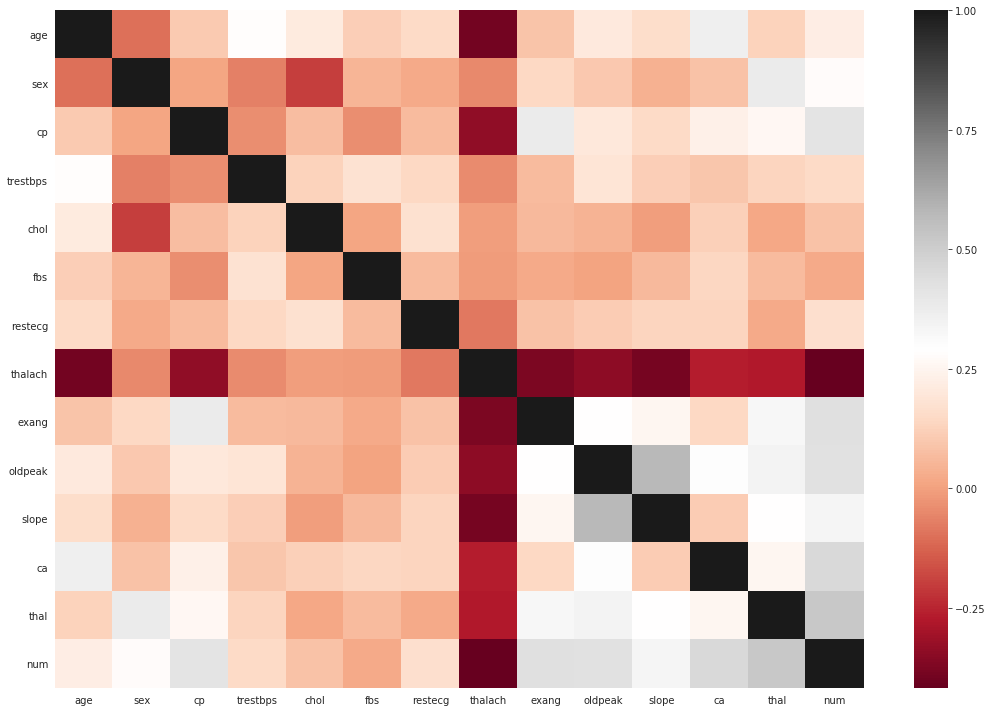

In [0]:
dfcorr = df.corr()

fig, ax = plt.subplots(figsize=(15,10));

sns.heatmap(dfcorr,cmap="RdGy");
plt.tight_layout()

**Valores Ausentes**

Nesta etapa vamos analisar o dataset e ver se ha valores faltantes, e se caso houver, tomaremos a descição de retiralos ou incrementalos.

In [0]:
df.isnull().sum().sort_values(ascending=False)

num         0
thal        0
ca          0
slope       0
oldpeak     0
exang       0
thalach     0
restecg     0
fbs         0
chol        0
trestbps    0
cp          0
sex         0
age         0
dtype: int64

*Obs.: Como visto, não há valores ausentes.*

**Análise de pessoas**

Vamos agora saber quantas pessoas há e seus respectivos sexos.

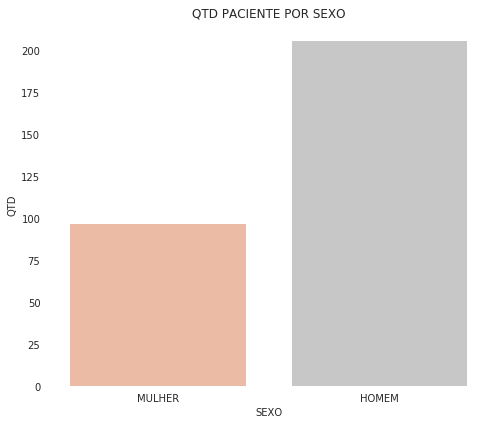

In [0]:
fig, ax = plt.subplots(figsize=(7,6));
sns.countplot(df.sex, palette="RdGy")
ax.set_title("QTD PACIENTE POR SEXO")
ax.set_xlabel("SEXO")
ax.set_ylabel("QTD")
ax.set_xticklabels(["MULHER","HOMEM"])
plt.grid(False)
sns.set_style("darkgrid", {"axes.facecolor": "1"})
plt.tight_layout();

In [0]:
print("\t{} - HOMEM:\t{} - MEDIA DE IDADE :\t{}".format(df['sex'][1],df.sex.value_counts()[1],df["age"][0].mean()))
print("\t{} - MULHER:\t{}- - MEDIA DE IDADE :\t{}".format(df['sex'][4],df.sex.value_counts()[0],df["age"][1].mean()))

	1.0 - HOMEM:	206 - MEDIA DE IDADE :	63.0
	0.0 - MULHER:	97- - MEDIA DE IDADE :	67.0


**1.0 - HOMEM:	206**

**0.0 - MULHER:	97**

Obs.: Dos 303 pacientes há mais pacientes homens do que mulheres.

**Analise comparativa para idade e colesterol**

Vamos agora ver o quanto a idade pode afetar a causa do colesterol nas pessoas.

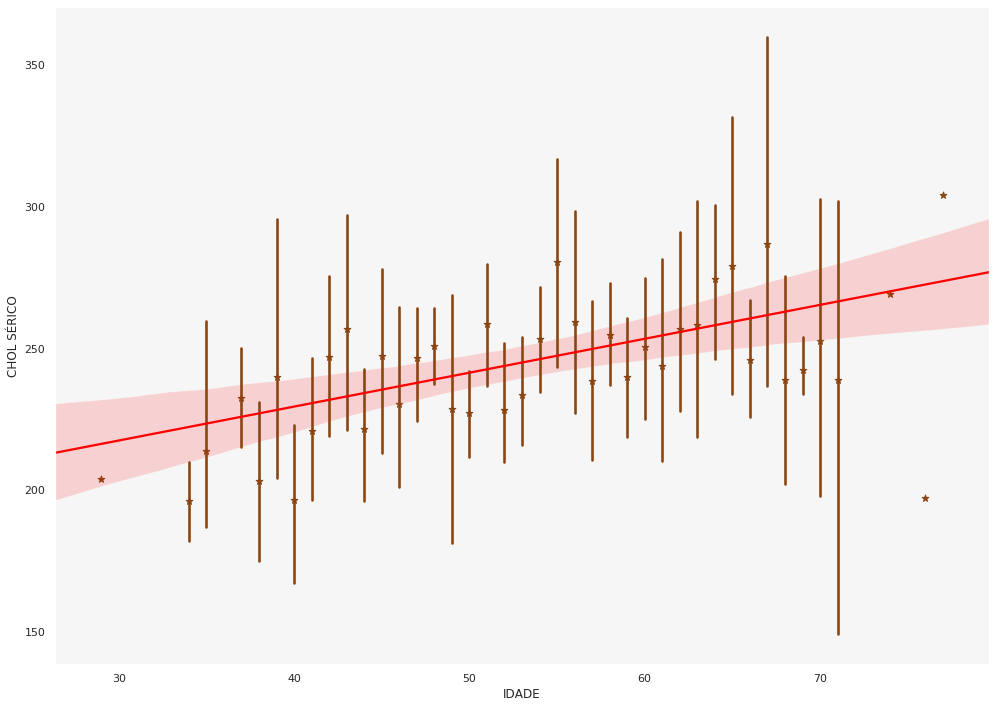

In [0]:
fig, ax = plt.subplots(figsize=(14,10))
sns.regplot(x='age', y='chol', data=df, ax=ax, marker="*", scatter_kws={"color": "saddlebrown"} ,line_kws={"color": "red"},x_estimator=np.mean)
sns.set_style("darkgrid", {"axes.facecolor": "10"})
ax.set_xlabel("IDADE")
plt.grid(False)
ax.set_ylabel("CHOL SÉRICO")
plt.tight_layout();

Obs.: Com esse grafico percebemos que a uma correção entre a idade e o sintomas, como se fosse um pico muito alto apartir dos 39 anos e logo depois diminui, provavelmente por conta da preocupação da pessoa, mas logo em seguida segue um fluxo de crescimento nitido. 

**Analise do colesterol sérico**

Para essa analise utilizaremos um Series/Coluna do nosso dataframe já predefinida, para analisarmos e ver oque encontramos

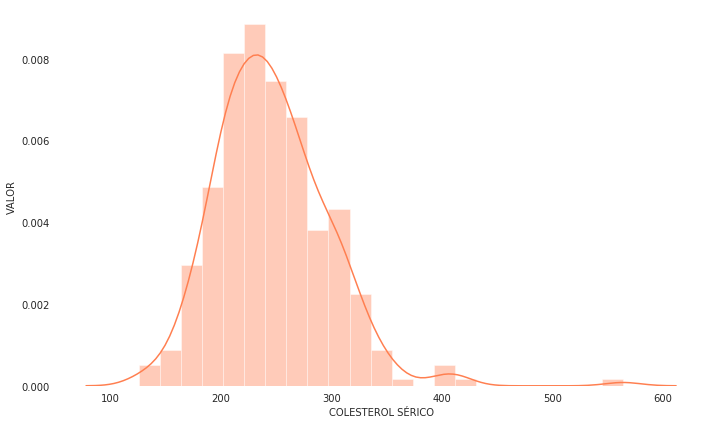

In [0]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(df.chol, ax=ax , color='coral')
ax.set_xlabel("COLESTEROL SÉRICO")
ax.set_ylabel("VALOR")
sns.set_style("darkgrid", {"axes.facecolor": "1"})
plt.grid(False)
plt.tight_layout();

Apartir desse grafico identificamos um *outlier*, (valores que são discrepantes) então vamos aproveitar e verificar se há outros outliers.

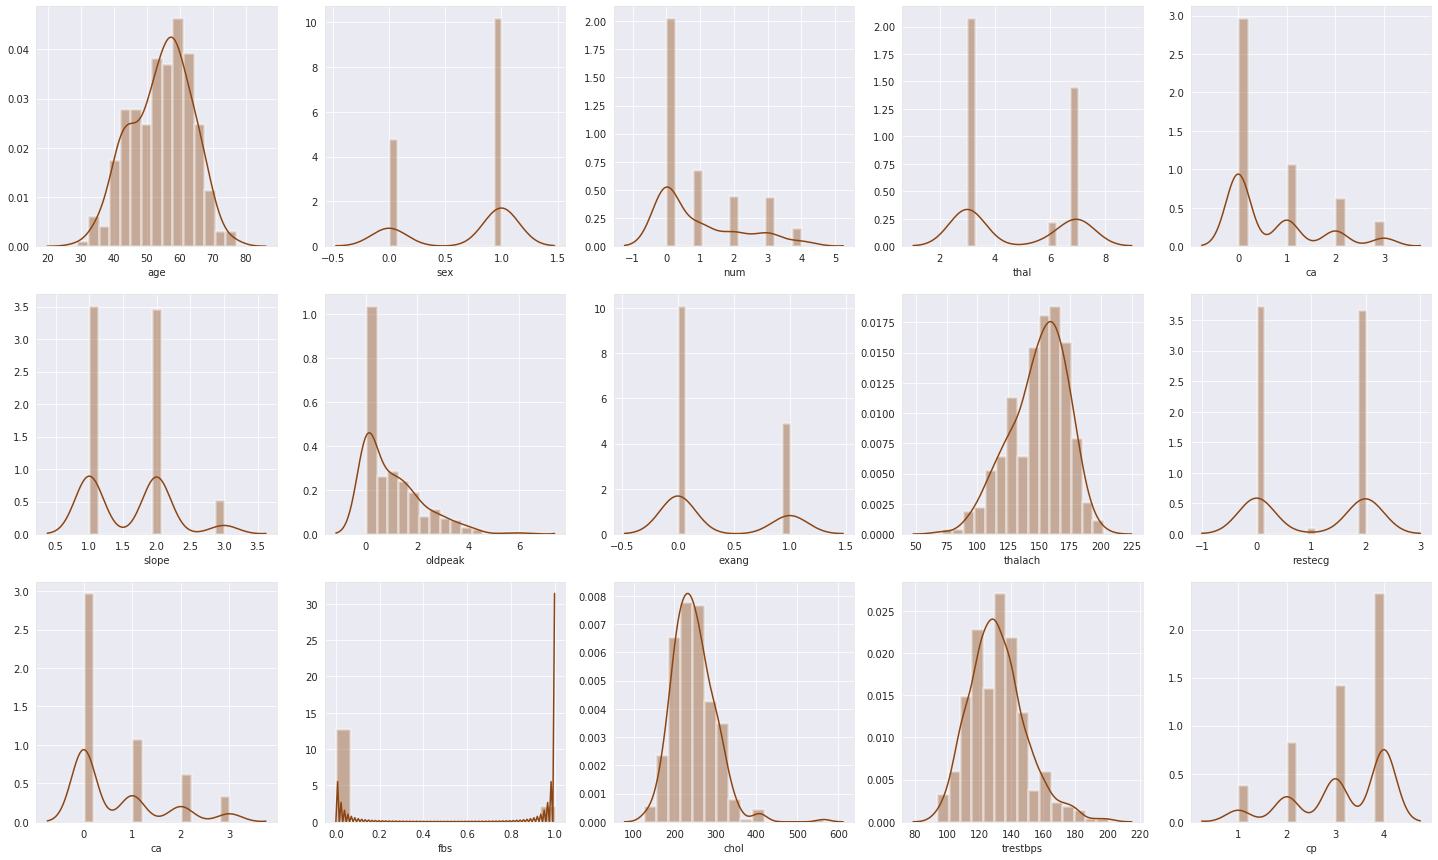

In [0]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(3,5,figsize = (25,15))
plt.rcParams["patch.force_edgecolor"] = True

vis1 = sns.distplot(df["age"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white",linewidth=2.5),ax= ax[0][0])
vis2 = sns.distplot(df["sex"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white",linewidth=2.5),ax=ax[0][1])
vis3 = sns.distplot(df["num"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5),ax=ax[0][2])
vis4 = sns.distplot(df["thal"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5), ax=ax[0][3])
vis5 = sns.distplot(df["ca"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5),ax=ax[0][4])
vis6 = sns.distplot(df["slope"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5),ax=ax[1][0])
vis7 = sns.distplot(df["oldpeak"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5),ax= ax[1][1])
vis8 = sns.distplot(df["exang"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white",linewidth=2.5),ax=ax[1][2])
vis9 = sns.distplot(df["thalach"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5),ax=ax[1][3])
vis10 = sns.distplot(df["restecg"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5), ax=ax[1][4])
vis11 = sns.distplot(df["ca"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5),ax=ax[2][0])
vis12 = sns.distplot(df["fbs"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5),ax=ax[2][1])
vis13 = sns.distplot(df["chol"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white",linewidth=2.5),ax=ax[2][2])
vis14 = sns.distplot(df["trestbps"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5),ax=ax[2][3])
vis15 = sns.distplot(df["cp"],bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5), ax=ax[2][4])


Com isso, encontramos alguns outliers, que são, Chol e Oldpeak mas para uma analise mais profunda vamos utilizar o bloxplot

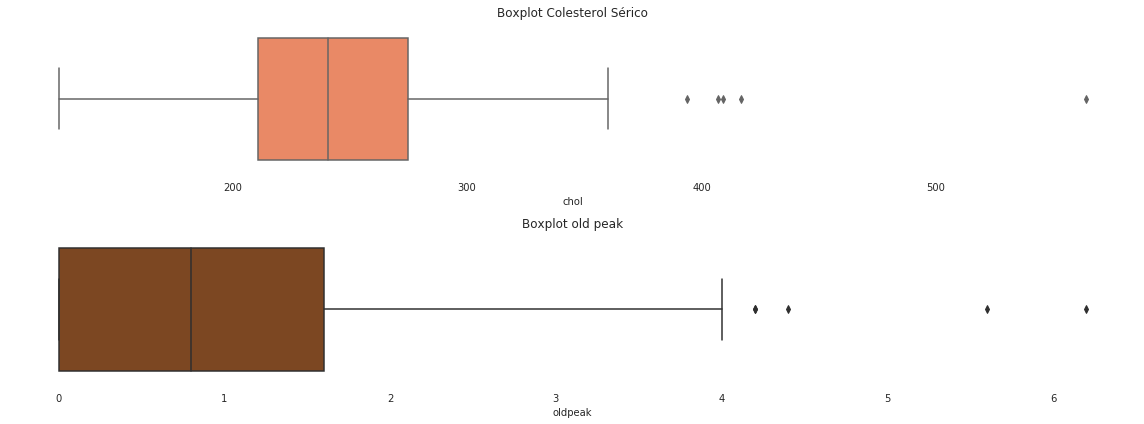

In [0]:
color="coral"sns.set_style('darkgrid',{'axes.facecolor': '1'})
f, ax = plt.subplots(2,1, figsize = (16,6))

sns.boxplot(df['chol'], ax=ax[0],color='coral')
ax[0].set_title('Boxplot Colesterol Sérico', fontsize=12)
sns.boxplot(df['oldpeak'], ax=ax[1],color='saddlebrown')
ax[1].set_title('Boxplot old peak', fontsize=12)
plt.tight_layout();

Obs.: Por sorte esse não apresentam uma discrepancia grande nos seus dados, então não precisaremos nos preocupar

**Analise do eletrocardiograma de repouso**

Nesta analise, nós temos 3 tipos de causas.

0 - NORMAL : *Pessoas sem nenhum problema na saude.*

1 - ANORMALIDADES DE ST-T.

2 - HIPERTROFIA VENTRICULAR ESQUERDA PROVÁVEL OU DEFINITIVA.

Destas 3, vamos dar uma olhada o quanto elas são presentes no nosso dataset


In [0]:
dfc = df.restecg.value_counts(ascending=True)
dfc.sort_index(inplace=True)

print("\t{} - NORMAL :\t{}\t".format(dfc.index[0], df.restecg.value_counts()[0]))
print("\t{} - ANORMALIDADES DE ST-T:\t{}".format(dfc.index[1], df.restecg.value_counts()[1]))
print("\t{} - HIPERTROFIA VENTRICULAR:\t{}".format(dfc.index[2], df.restecg.value_counts()[2]))

	0.0 - NORMAL :	151	
	1.0 - ANORMALIDADES DE ST-T:	4
	2.0 - HIPERTROFIA VENTRICULAR:	148


In [0]:
print("\tPENCETUAL DO DIAGNOSTICO 0:\t{:.1f}%".format(dfc.values[0] / dfc.sum()*100))
print("\tPENCETUAL DO DIAGNOSTICO 1:\t{:.1f}%".format(dfc.values[1] / dfc.sum()*100))
print("\tPENCETUAL DO DIAGNOSTICO 2:\t{:.1f}%".format(dfc.values[2] / dfc.sum()*100))

	PENCETUAL DO DIAGNOSTICO 0:	49.8%
	PENCETUAL DO DIAGNOSTICO 1:	1.3%
	PENCETUAL DO DIAGNOSTICO 2:	48.8%


Percebemos que o tipo **0** e **2** são os mais presentes no nosso Dataset, mas agora uma pergunta interessante a se fazer é, Q*uais dos sexos são mais presentes no nosso DataSet ?*

Então vamos dar uma olhada !

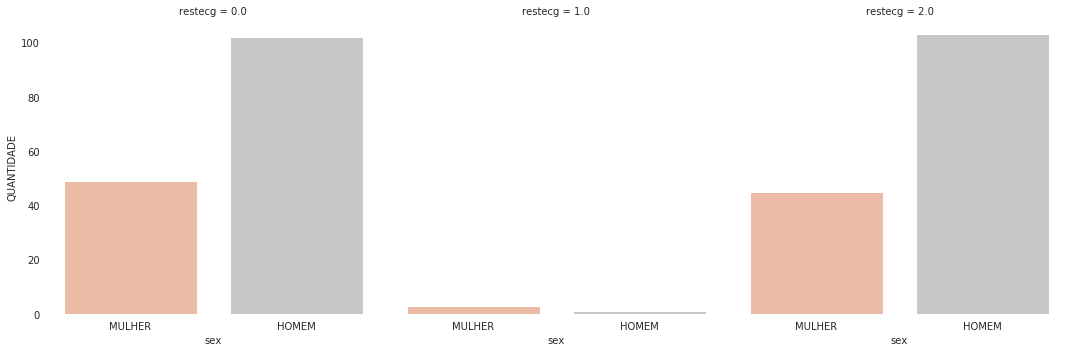

In [0]:
g = sns.catplot(x="sex",col="restecg",data=df, kind="count",palette="RdGy")
g.set_xticklabels(["MULHER", "HOMEM"])
g.set_ylabels('QUANTIDADE')
plt.tight_layout()
nldf = df.get(['sex','age','num','fbs','chol','restecg'])


Obs.: Como foi visto, por haver mais homens em nosso DataBase, eles foram os mais afetados, porém no diagnostico tipo 1 as mulher tiveram mais frequencia.

Agora para finalizar essa etapa vamos plotar um grafico de pizza para complementar o intendimento

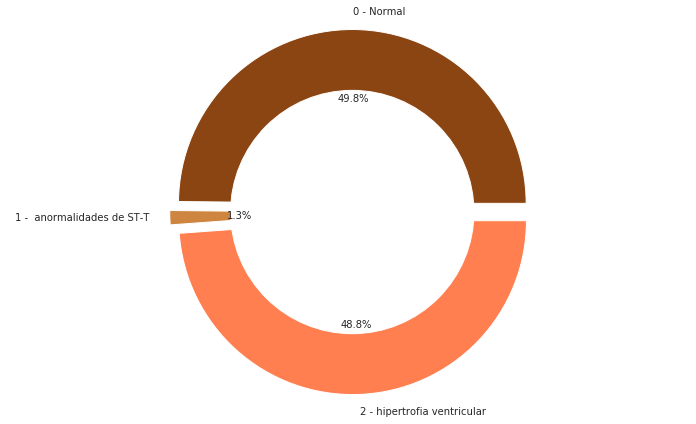

In [0]:
# Pie chart
lb = ['0 - Normal','1 -  anormalidades de ST-T ','2 - hipertrofia ventricular']
sz = dfc.values

colors = ['saddlebrown','peru','coral']
explode = (0.05,0.05,0.05)

fig, ax = plt.subplots(figsize=(10,6))
ax.pie(sz,labels=lb, colors=colors, explode=explode, autopct='%1.1f%%', startangle=360)

# desenho de circulo
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Proporção de aspecto igual garante que a torta seja desenhada como um círculo
ax.axis('equal')
plt.tight_layout();

# COMO O BRASIL TEM VIVIDO COM ESSE PROBLEMA ?

Vamos analisar um Dataset do Brasil que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017).

In [0]:
df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672


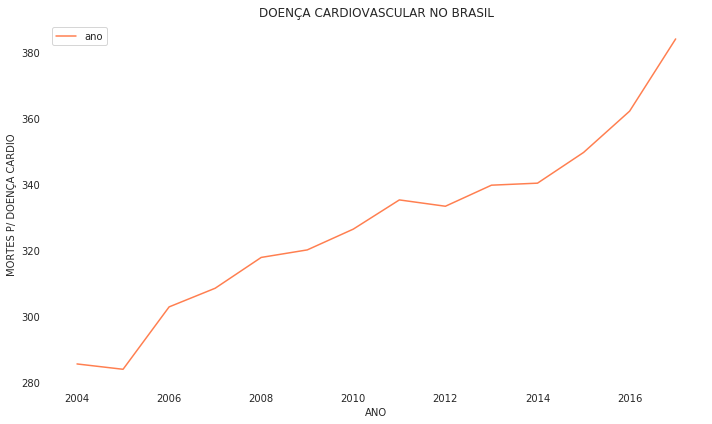

In [0]:
fig, ax = plt.subplots(figsize=(10,6));

sns.lineplot(x="ano", y="mortes_doencas_cardio", data=df_brasil, color='coral', ax=ax, label="ano")
plt.grid(False)
sns.set_style("darkgrid", {"axes.facecolor": "1"})
ax.set_title("DOENÇA CARDIOVASCULAR NO BRASIL")
ax.set_ylabel("MORTES P/ DOENÇA CARDIO")
ax.set_xlabel("ANO")

plt.tight_layout();

# CONCLUÇÃO

* Primeiro Dataset

Foi concluido que o diagnostico de doença cardiovasculares é muito mais recorrente em homens em media de idade de 63 anos, as mulheres que tambem sofrem dessa doença tem em media 67 anos. 

Algo a se pontuar sobre o colesterol sérico, ele começa por volta dos 35 e 40 anos mas tem seus picos mais altos por volta dos 50 ao 70 anos.

* Segundo Dataset

É nitido a crescente desta doença apartir de 2006, mas é vem horrorosamente agressiva de 2014 em diante, e é um sinal preocupante.